# CAT risk model

In [1]:
import numpy as np
import math

In [2]:
## define environment ##

# to define the study area
xmin=0;xmax=100;dx=1; 
ymin=0;ymax=100;dy=1;

# to get a smaller area with faults inside
# dx_fault=100; 
# dx_fault=100;

# study area 
x = np.arange(xmin,xmax,dx)
y = np.arange(ymin,ymax,dy)

# fault area
# x_fault = np.arange(xmin-dx_fault,xmax,dx)
# y_fault = np.arange(ymin-dy_fault,ymax,dy)

In [3]:
def GetMagnitude(L, a = 5.08, b = 1.16): 
    M = a + b * np.log10(L)
    return M

def distance(point1, point2):
    d = 0
    for i in range(len(point1)):
        d += (point1[i] - point2[i]) ** 2
    return np.sqrt(d)

In [6]:
## HAZARD ASSESSMENT ##

# define source model
# FOR NOW 2D NOT 3D
# SRC = {5 faults, location, }

SRC = {'ID': ['src1', 'src2'],
       'ini': [[20, 40], [60, 0]],
       'iend': [[20, 110], [110, 50]],
       'S': []
      }

for i in range(len(SRC['ID'])):
    point1=SRC['ini'][i]
    point2=SRC['iend'][i]
    
    M = GetMagnitude(distance(point1, point2))
    print(distance(point1, point2))
    SRC['S'].append(M)
    
SRC['S']
Mmax = max(SRC['S'])
Mmax

70.0
70.71067811865476


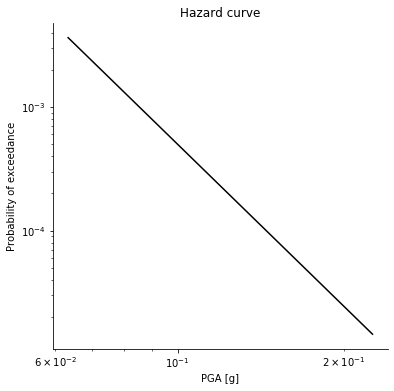

In [7]:
# define size distribution
from scipy.stats import norm
import matplotlib.pyplot as plt

# discretise the magnitude Mi range
Mmin = 5
Mmax = max(SRC['S'])
DM = 0.1
# Mi = np.arange(Mmin,Mmax+DM,DM)
#### CORRECT
Mi = np.arange(Mmin,Mmax,DM)

# calculate the rate of earthquakes of magnitude Mi
a = 3.5
b = 1
ratei = 10**(a - b * (Mi-DM/2)) - 10**(a - b * (Mi+DM/2))

# calculate the mean PGA at the site for earthquakes of magnitude Mi
### grid point => footprint
# d = 10
# h = 2
r = math.sqrt(d**2 + h**2)
Ii = 10 ** (-1.34 + 0.23 * Mi - math.log10(r))


In [ ]:
# define event table => go to SED website for seismicities

# correct rate, function of stoch.set definition (normalization)

In [ ]:
# define intensity footprint
# discrete the fault and calculate the counter line for the house (intensity and OGA)